# Analysis of Airbnb Seattle

## I. Business Understanding 

The one-year Seattle Airbnb home data is analyzed in this notebook.
1. Calendar.csv : includes all price listings of airbnb housing from 01/01/2016 to 01/07/2017.
2. listing.csv : includes the specific information about the listing such as review_score, neighbourhood etc.

There are questions I try to explore from these datasets, they are:
1. Which are the most Popular destinations in Seattle?
2. Where are the popular neighbourhood destination for majority visitors in Seattle? 
3. Which neighbourhood's would continue to record an increasing number of tourists based on rating scores given by previous visitors?
4. What are the earnings and reviews by host?
5. How much should the host set their price of listings?

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import seaborn as sns


#import packages for price prediction

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import StratifiedShuffleSplit


## II. Data Understanding
There are 3 files in the dataset:

listings.csv: provides information about price, types of rooms, property types, hosts, number of reviews and many more. There exist 3818 Airbnb listings in Seattle.
There are 44 columns with missing data ranging from 0.01% to 100% missing
Columns with the most missing data are: square_feet, lisence, notes, prices.
There are 2751 hosts in the data and 20% of them are superhosts

calendar.csv: provides information about occupancy and availability for 2873 listing everyday from January 2016 - January 2017
There exist 4 columns in the calendar dataset: listings Id, date, availability, price. Price is the only column with N/A value in this dataset.

reviews.csv: provides 84849 reviews for each property from 2009. About 3191 listings have about 85k reviews from 2009-2016 and out of all 18 reviews have missing comments. 


In [3]:
#import datasets
df = pd.read_csv('listings.csv')
review = pd.read_csv('reviews.csv')
cal = pd.read_csv('calendar.csv')

In [4]:
print('Listing dataset has %2d records and %2d columns' %(df.shape[0],df.shape[1]))
print('Reviews dataset has %2d records and %2d columns' %(review.shape[0],review.shape[1]))
print('Calendar dataset has %2d records and %2d columns' %(cal.shape[0],cal.shape[1]))

Listing dataset has 3818 records and 92 columns
Reviews dataset has 84849 records and  6 columns
Calendar dataset has 1393570 records and  4 columns


In [5]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [6]:
a= df['neighbourhood_group_cleansed']
a

0                Queen Anne
1                Queen Anne
2                Queen Anne
3                Queen Anne
4                Queen Anne
               ...         
3813    Other neighborhoods
3814           Capitol Hill
3815         Rainier Valley
3816           Capitol Hill
3817             Queen Anne
Name: neighbourhood_group_cleansed, Length: 3818, dtype: object

In [7]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [8]:
#Shows number of rows and columns available
num_row = df.shape[0]#....ROWS[0]
num_col = df.shape[1]#....COLS[1]

print('There are {} rows and {} columns in the data'. format(num_row, num_col))

There are 3818 rows and 92 columns in the data


In [9]:
#displays column names
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '


3) Prepare Data
Clean
First, we will prepare the data into a form which would be accessible for our analysis

1) remove unused columns

2) check for rows and attributes with missing data

3) handle the missing data

In [10]:
#select a list of important attributes
df = df[['neighbourhood', 'property_type', 'price', 'review_scores_rating', 'number_of_reviews','accommodates','neighbourhood_group_cleansed','zipcode','room_type','bed_type','bedrooms','bathrooms','beds','host_is_superhost'
          ,'accommodates', 'number_of_reviews']]
df.head()


,neighbourhood,property_type,price,review_scores_rating,number_of_reviews,accommodates,neighbourhood_group_cleansed,zipcode,room_type,bed_type,bedrooms,bathrooms,beds,host_is_superhost,accommodates,number_of_reviews
0,Queen Anne,Apartment,$85.00,95.0,207,4,Queen Anne,98119,Entire home/apt,Real Bed,1.0,1.0,1.0,f,4,207
1,Queen Anne,Apartment,$150.00,96.0,43,4,Queen Anne,98119,Entire home/apt,Real Bed,1.0,1.0,1.0,t,4,43
2,Queen Anne,House,$975.00,97.0,20,11,Queen Anne,98119,Entire home/apt,Real Bed,5.0,4.5,7.0,f,11,20
3,Queen Anne,Apartment,$100.00,NaN,0,3,Queen Anne,98119,Entire home/apt,Real Bed,0.0,1.0,2.0,f,3,0
4,Queen Anne,House,$450.00,92.0,38,6,Queen Anne,98119,Entire home/apt,Real Bed,3.0,2.0,3.0,f,6,38


In [11]:
df.tail()

,neighbourhood,property_type,price,review_scores_rating,number_of_reviews,accommodates,neighbourhood_group_cleansed,zipcode,room_type,bed_type,bedrooms,bathrooms,beds,host_is_superhost,accommodates,number_of_reviews
3813,Fremont,House,$359.00,80.0,1,6,Other neighborhoods,98107,Entire home/apt,Real Bed,3.0,2.0,3.0,f,6,1
3814,Portage Bay,Apartment,$79.00,100.0,2,4,Capitol Hill,98102,Entire home/apt,Real Bed,1.0,1.0,2.0,f,4,2
3815,NaN,House,$93.00,NaN,0,2,Rainier Valley,98178,Entire home/apt,Real Bed,1.0,1.0,1.0,f,2,0
3816,NaN,Condominium,$99.00,NaN,0,2,Capitol Hill,98112,Entire home/apt,Real Bed,0.0,1.0,1.0,f,2,0
3817,Queen Anne,Apartment,$87.00,NaN,0,3,Queen Anne,98109,Entire home/apt,Real Bed,2.0,1.5,1.0,f,3,0


In [12]:
#identify columns with missing values
print(df.isnull().sum())

neighbourhood                   416
property_type                     1
price                             0
review_scores_rating            647
number_of_reviews                 0
accommodates                      0
neighbourhood_group_cleansed      0
zipcode                           7
room_type                         0
bed_type                          0
bedrooms                          6
bathrooms                        16
beds                              1
host_is_superhost                 2
accommodates                      0
number_of_reviews                 0
dtype: int64


# Q1. Popular destination in Seattle

In [13]:
n_attri = df['neighbourhood'] 
n_attri.head()

0    Queen Anne
1    Queen Anne
2    Queen Anne
3    Queen Anne
4    Queen Anne
Name: neighbourhood, dtype: object

In [14]:
n_attri.tail()

3813        Fremont
3814    Portage Bay
3815            NaN
3816            NaN
3817     Queen Anne
Name: neighbourhood, dtype: object

In [15]:
df['neighbourhood'].describe()

count             3402
unique              81
top       Capitol Hill
freq               351
Name: neighbourhood, dtype: object

In [16]:
df['neighbourhood'].nunique()

81

In [17]:
df['neighbourhood'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
3813    False
3814    False
3815     True
3816     True
3817    False
Name: neighbourhood, Length: 3818, dtype: bool

In [18]:
#missing values
miss = pd.isnull(df['neighbourhood']).sum()
miss

416

In [19]:
# drop missing values from neighbourhood attribute
n_attri = df.neighbourhood.value_counts().dropna()
n_attri.head()

Capitol Hill    351
Ballard         213
Belltown        204
Minor           192
Queen Anne      187
Name: neighbourhood, dtype: int64

## III. Visualize and analyze

In [20]:
#plot distribution graph
def plotgraph(df, col, title, xlabel, ylabel, click):
    """
    This function plots property types distribution graph
    
    Args:
        df(dataframe): contains the data dataframe
        col (attributes analysis): property types value counts
        click(int): whether the whole graph should display(0) or the top five graph display (1)
        
    Return:
        None
    """
    #Plot the data:
    my_colors = ['b','g','y','violet','orange','pink']  #red, green, blue, black, etc.
    
    if click == 0:
        (col/df.shape[0]).plot(kind ='bar',color = my_colors)
    else:
        (col[:5]/df.shape[0]).plot(kind ='bar',color = my_colors)
        
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [21]:
# Distribution of neighbourhood types in seattle city
n_attri = df.neighbourhood.value_counts()
n_attri.head()

Capitol Hill    351
Ballard         213
Belltown        204
Minor           192
Queen Anne      187
Name: neighbourhood, dtype: int64

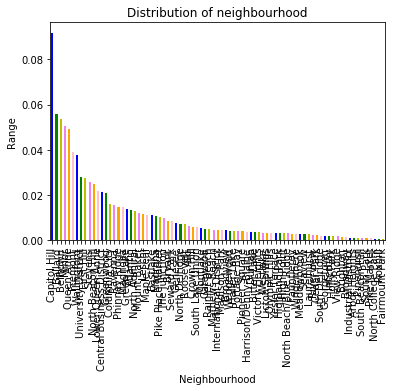

In [22]:
#plot graph of all property_types
plotgraph(df, n_attri, 'Distribution of neighbourhood', 'Neighbourhood', 'Range', 0)


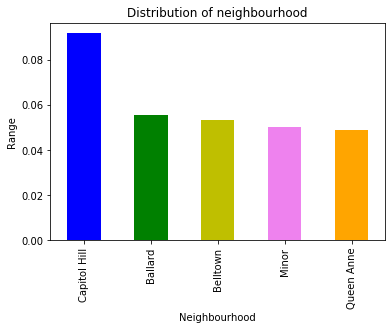

In [23]:
#plot graph of top 5 property_types 
plotgraph(df, n_attri, 'Distribution of neighbourhood', 'Neighbourhood', 'Range', 1)


In [24]:
# Analyze the neighbourhood attribute in relation to the number of review score given by past tourists
neighbourhood_review_rating = df.groupby('neighbourhood', as_index=True).agg({"review_scores_rating": "sum"}).dropna()
neighbourhood_review_rating = neighbourhood_review_rating.sort_values('review_scores_rating', ascending=False)
neighbourhood_review_rating.head()

,review_scores_rating
neighbourhood,
Capitol Hill,26863.0
Ballard,17455.0
Belltown,16988.0
Minor,16737.0
Queen Anne,15580.0



Evaluation
Clearly, it could be infered that more tourists would tend to visit Capitol Hill or Ballard. This could be possible becuase, regions with higher rating scores would maintain a higher number of vacationists as people would likely recommend nice spots to their contemporaries for vacation.

On the other hand, places with higher visits but low reviews such as University Districts and Stevens could experience a decline in tourist activities.

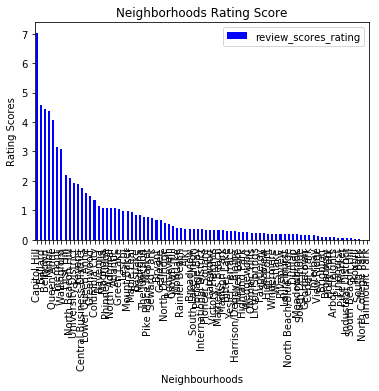

In [25]:
# plot graph of all Rated Neighborhoods
plotgraph(df, neighbourhood_review_rating, "Neighborhoods Rating Score", "Neighbourhoods", "Rating Scores", 0)

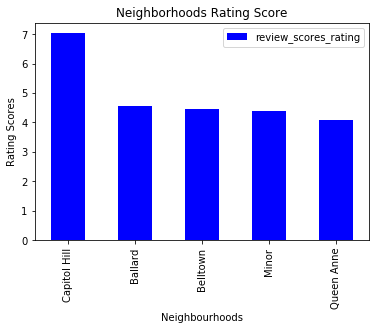

In [26]:
# plot graph of all Rated Neighborhoods
plotgraph(df, neighbourhood_review_rating, "Neighborhoods Rating Score", "Neighbourhoods", "Rating Scores", 1)

## Price prediction

In [27]:
#clean the 'price' column and convert to float64
df['cleaned_price'] = df['price'].str.replace('$','')
df['cleaned_price'] = df['cleaned_price'].str.replace("''","")
df['cleaned_price'] = df['cleaned_price'].str.replace(",","")
df['cleaned_price'] = df['cleaned_price'].astype('float')

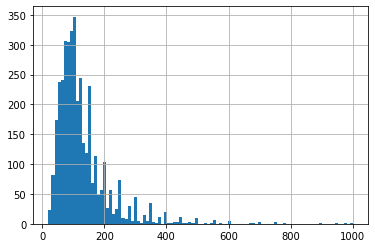

In [28]:
df['cleaned_price'].hist(bins=100)

In [29]:
df1 = ['neighbourhood_group_cleansed','zipcode','room_type','bed_type','bedrooms','bathrooms','beds','host_is_superhost','accommodates','number_of_reviews','cleaned_price']

In [31]:
subset = df[df1]


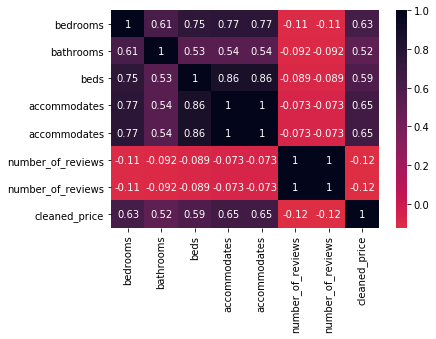

In [32]:
#A correlation matrix between continous variables 
corr = subset.corr()
cmap = sns.cm.rocket_r
ax = sns.heatmap(corr, annot=True, center = 0, cmap = cmap, linecolor='white')

In [35]:
#check the proportion of listings by neighborhood group between the original dataset and train/test set after split
subset['neighborhood_group_cleansed'].value_counts()/len(subset)


Other neighborhoods    0.207962
Capitol Hill           0.148507
Downtown               0.138816
Central Area           0.096647
Queen Anne             0.077266
Ballard                0.060241
West Seattle           0.053169
Rainier Valley         0.041645
University District    0.031954
Beacon Hill            0.030906
Cascade                0.023311
Northgate              0.020953
Delridge               0.020691
Lake City              0.017548
Magnolia               0.015977
Seward Park            0.011524
Interbay               0.002881
Name: neighbourhood_group_cleansed, dtype: float64

In [36]:
strat_test_set['neighbourhood_group_cleansed'].value_counts()/len(strat_test_set)

Other neighborhoods    0.208115
Capitol Hill           0.147906
Downtown               0.138743
Central Area           0.096859
Queen Anne             0.077225
Ballard                0.060209
West Seattle           0.053665
Rainier Valley         0.041885
Beacon Hill            0.031414
University District    0.031414
Cascade                0.023560
Delridge               0.020942
Northgate              0.020942
Lake City              0.017016
Magnolia               0.015707
Seward Park            0.011780
Interbay               0.002618
Name: neighbourhood_group_cleansed, dtype: float64

In [37]:
start_train_set['neighbourhood_group_cleansed'].value_counts()/len(strat_train_set)

Other neighborhoods    0.207924
Capitol Hill           0.148657
Downtown               0.138834
Central Area           0.096595
Queen Anne             0.077276
Ballard                0.060249
West Seattle           0.053045
Rainier Valley         0.041585
University District    0.032089
Beacon Hill            0.030779
Cascade                0.023248
Northgate              0.020956
Delridge               0.020629
Lake City              0.017682
Magnolia               0.016045
Seward Park            0.011460
Interbay               0.002947
Name: neighbourhood_group_cleansed, dtype: float64

In [38]:
X_train = start_train_set(['cleansed_price','beds'], axis=1)
y_train = strat_test_set([''])

X_train = strat_train_set.drop(['cleaned_price','beds'],axis=1)
y_train = strat_train_set['cleaned_price']

X_test = strat_test_set.drop(['cleaned_price','beds'],axis=1)
y_test = strat_test_set['cleaned_price']

In [39]:

X_train.head()

,neighbourhood_group_cleansed,zipcode,room_type,bed_type,bedrooms,bathrooms,host_is_superhost,accommodates,accommodates,number_of_reviews,number_of_reviews
1651,Downtown,98104,Entire home/apt,Real Bed,0.0,1.0,f,1,1,0,0
495,Queen Anne,98119,Entire home/apt,Real Bed,2.0,1.0,t,4,4,7,7
605,Central Area,98122,Entire home/apt,Real Bed,1.0,1.0,f,3,3,181,181
1832,Other neighborhoods,98117,Private room,Real Bed,1.0,1.0,f,2,2,22,22
2049,Other neighborhoods,98103,Entire home/apt,Real Bed,1.0,1.0,f,1,1,0,0


In [59]:
print('Train set has {} samples.'.format(X_train.shape[0]))
print('Test set has {} samples.'.format(X_test.shape[0]))

Train set has 3054 samples.
Test set has 764 samples.


In [61]:
def run(model, X, y, state = 42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = state)
    pred = model.fit(X_train, y_train).predict(X_test)
    score=model.score(X_test, y_test)
    rmse=np.sqrt(metrics.mean_squared_error(y_test, pred))
    r2_test = r2_score(y_test,pred)
    return score, rmse, r2_test

## data modelling

In [ ]:
lin_
reg = LinearRegression(normalize=True)
train_test(X_train, X_test, y_train, y_test,lin_reg)

In [ ]:
models = [lin_reg]

score = []
rmse = []
r2 = []

for model in models:
    model_score, model_rmse, model_r2 = run(model,X, y,state = 20)
    score.append(model_score)
    rmse.append(model_rmse)
    r2.append(model_r2)